# 00 - Exploration

In [22]:
%load_ext watermark
%watermark -v -n -m -p numpy,scipy,sklearn,pandas

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Mon Oct 22 2018 

CPython 3.6.4
IPython 7.0.1

numpy 1.15.2
scipy 1.1.0
sklearn 0.20.0
pandas 0.23.4

compiler   : GCC 7.2.0
system     : Linux
release    : 4.15.0-36-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 12
interpreter: 64bit


In [23]:
# Magic commands must be in separate cells 
# to properly display light background for 
# plots with JupyterLab dark theme 

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
import numpy as np
import pandas as pd
import sys

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mtick

import seaborn as sns
plt.style.use('ggplot')
sns.set()
# plt.style.use('seaborn')
mpl.style.use('seaborn')

pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.max_columns = 999
pd.options.display.max_rows = 40
np.set_printoptions(precision=6)

DATA_PATH = '../data/'

print(pd.__version__)

0.23.4


# Read CSV

In [25]:
import os

RAW_PATH = os.path.join(DATA_PATH, 'raw', 'diabetic_data.csv')

raw_df = pd.read_csv(RAW_PATH, na_values='?')

# replace NO as >30
raw_df['readmitted'] = raw_df['readmitted'].replace({'NO': '>30'})

print(raw_df.shape)
display(raw_df.head())

(101766, 50)


/home/nathaniel/miniconda3/envs/dia/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,>30
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,>30


## Feature Info
- Null values
- data types (dtypes)
- unique values

In [26]:
print(f'Total num samples: {raw_df.shape[0]} \n')

null_df = raw_df.isnull().sum()
dtypes_df = raw_df.dtypes
nunique_df = raw_df.nunique()

summary_df = pd.concat([null_df, dtypes_df, nunique_df], axis=1)
summary_df.columns = ['num_null', 'dtype', 'nunique']

display(summary_df)

Total num samples: 101766 



,num_null,dtype,nunique
encounter_id,0,int64,101766
patient_nbr,0,int64,71518
race,2273,object,5
gender,0,object,3
age,0,object,10
weight,98569,object,9
admission_type_id,0,int64,8
discharge_disposition_id,0,int64,26
admission_source_id,0,int64,17
time_in_hospital,0,int64,14


## Define Feature Types

In [27]:
ignore_features = [
    'encounter_id',
    'patient_nbr',
]

continuous_features = [
    'time_in_hospital',
    'num_lab_procedures',
    'num_procedures',
    'num_medications',
    'number_outpatient',
    'number_emergency',
    'number_inpatient',
    'number_diagnoses',
]

output_features = ['readmitted']

categorical_features = [var for var in raw_df.columns 
                        if var not in ignore_features 
                        and var not in continuous_features
                        and var not in output_features]

print(categorical_features)

['race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed']


## Inspect Continuous Features - Before Downsampling

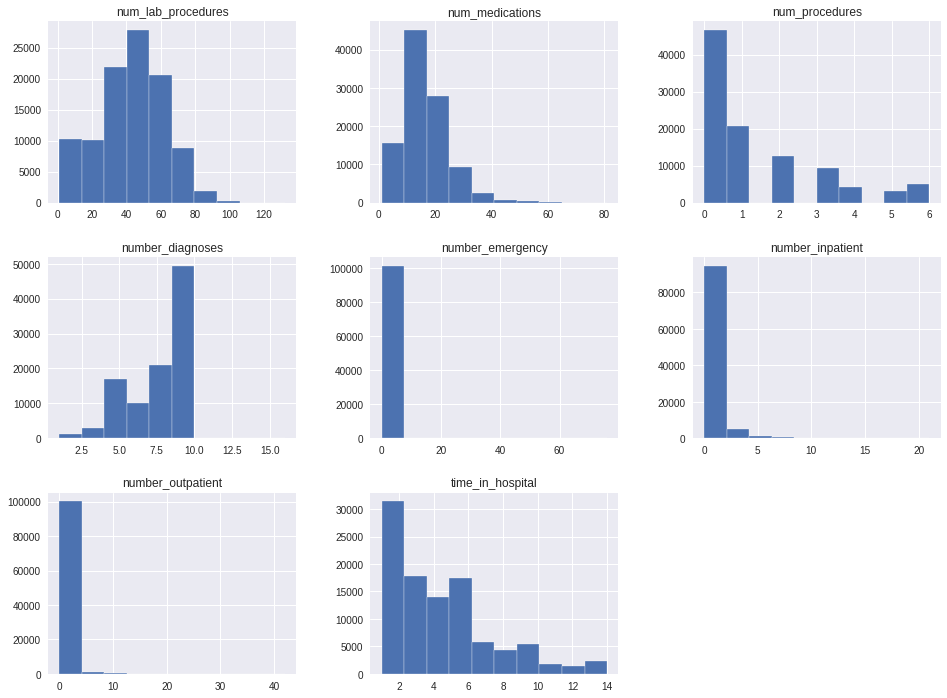

In [28]:
axes = raw_df.hist(column=continuous_features, figsize=(16,12))

## Inspect Categorical Features - Before Downsampling

In [29]:
def display_categorical_features(df, features, ignore):
    for var in features:
        if var in ignore:
            continue
        print(f'\n{var}: {df[var].nunique()} unique values \n')
        display(df[var].value_counts(dropna=False).sort_index())
        print('-'*50) 

In [30]:
display_categorical_features(raw_df, 
                             features=categorical_features+output_features, 
                             ignore=['diag_1', 'diag_2', 'diag_3'])


race: 5 unique values 



AfricanAmerican    19210
Asian                641
Caucasian          76099
Hispanic            2037
Other               1506
NaN                 2273
Name: race, dtype: int64

--------------------------------------------------

gender: 3 unique values 



Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

--------------------------------------------------

age: 10 unique values 



[0-10)        161
[10-20)       691
[20-30)      1657
[30-40)      3775
[40-50)      9685
[50-60)     17256
[60-70)     22483
[70-80)     26068
[80-90)     17197
[90-100)     2793
Name: age, dtype: int64

--------------------------------------------------

weight: 9 unique values 



>200             3
[0-25)          48
[100-125)      625
[125-150)      145
[150-175)       35
[175-200)       11
[25-50)         97
[50-75)        897
[75-100)      1336
NaN          98569
Name: weight, dtype: int64

--------------------------------------------------

admission_type_id: 8 unique values 



1    53990
2    18480
3    18869
4       10
5     4785
6     5291
7       21
8      320
Name: admission_type_id, dtype: int64

--------------------------------------------------

discharge_disposition_id: 26 unique values 



1     60234
2      2128
3     13954
4       815
5      1184
6     12902
7       623
8       108
9        21
10        6
11     1642
12        3
13      399
14      372
15       63
16       11
17       14
18     3691
19        8
20        2
22     1993
23      412
24       48
25      989
27        5
28      139
Name: discharge_disposition_id, dtype: int64

--------------------------------------------------

admission_source_id: 17 unique values 



1     29565
2      1104
3       187
4      3187
5       855
6      2264
7     57494
8        16
9       125
10        8
11        2
13        1
14        2
17     6781
20      161
22       12
25        2
Name: admission_source_id, dtype: int64

--------------------------------------------------

payer_code: 17 unique values 



BC      4655
CH       146
CM      1937
CP      2533
DM       549
FR         1
HM      6274
MC     32439
MD      3532
MP        79
OG      1033
OT        95
PO       592
SI        55
SP      5007
UN      2448
WC       135
NaN    40256
Name: payer_code, dtype: int64

--------------------------------------------------

medical_specialty: 72 unique values 



AllergyandImmunology                    7
Anesthesiology                         12
Anesthesiology-Pediatric               19
Cardiology                           5352
Cardiology-Pediatric                    7
DCPTEAM                                 6
Dentistry                               4
Dermatology                             1
Emergency/Trauma                     7565
Endocrinology                         120
Endocrinology-Metabolism                8
Family/GeneralPractice               7440
Gastroenterology                      564
Gynecology                             58
Hematology                             82
Hematology/Oncology                   207
Hospitalist                            57
InfectiousDiseases                     37
InternalMedicine                    14635
Nephrology                           1613
                                    ...  
Radiology                              53
Resident                                2
Rheumatology                      

--------------------------------------------------

max_glu_serum: 4 unique values 



>200     1485
>300     1264
None    96420
Norm     2597
Name: max_glu_serum, dtype: int64

--------------------------------------------------

A1Cresult: 4 unique values 



>7       3812
>8       8216
None    84748
Norm     4990
Name: A1Cresult, dtype: int64

--------------------------------------------------

metformin: 4 unique values 



Down        575
No        81778
Steady    18346
Up         1067
Name: metformin, dtype: int64

--------------------------------------------------

repaglinide: 4 unique values 



Down          45
No        100227
Steady      1384
Up           110
Name: repaglinide, dtype: int64

--------------------------------------------------

nateglinide: 4 unique values 



Down          11
No        101063
Steady       668
Up            24
Name: nateglinide, dtype: int64

--------------------------------------------------

chlorpropamide: 4 unique values 



Down           1
No        101680
Steady        79
Up             6
Name: chlorpropamide, dtype: int64

--------------------------------------------------

glimepiride: 4 unique values 



Down        194
No        96575
Steady     4670
Up          327
Name: glimepiride, dtype: int64

--------------------------------------------------

acetohexamide: 2 unique values 



No        101765
Steady         1
Name: acetohexamide, dtype: int64

--------------------------------------------------

glipizide: 4 unique values 



Down        560
No        89080
Steady    11356
Up          770
Name: glipizide, dtype: int64

--------------------------------------------------

glyburide: 4 unique values 



Down        564
No        91116
Steady     9274
Up          812
Name: glyburide, dtype: int64

--------------------------------------------------

tolbutamide: 2 unique values 



No        101743
Steady        23
Name: tolbutamide, dtype: int64

--------------------------------------------------

pioglitazone: 4 unique values 



Down        118
No        94438
Steady     6976
Up          234
Name: pioglitazone, dtype: int64

--------------------------------------------------

rosiglitazone: 4 unique values 



Down         87
No        95401
Steady     6100
Up          178
Name: rosiglitazone, dtype: int64

--------------------------------------------------

acarbose: 4 unique values 



Down           3
No        101458
Steady       295
Up            10
Name: acarbose, dtype: int64

--------------------------------------------------

miglitol: 4 unique values 



Down           5
No        101728
Steady        31
Up             2
Name: miglitol, dtype: int64

--------------------------------------------------

troglitazone: 2 unique values 



No        101763
Steady         3
Name: troglitazone, dtype: int64

--------------------------------------------------

tolazamide: 3 unique values 



No        101727
Steady        38
Up             1
Name: tolazamide, dtype: int64

--------------------------------------------------

examide: 1 unique values 



No    101766
Name: examide, dtype: int64

--------------------------------------------------

citoglipton: 1 unique values 



No    101766
Name: citoglipton, dtype: int64

--------------------------------------------------

insulin: 4 unique values 



Down      12218
No        47383
Steady    30849
Up        11316
Name: insulin, dtype: int64

--------------------------------------------------

glyburide-metformin: 4 unique values 



Down           6
No        101060
Steady       692
Up             8
Name: glyburide-metformin, dtype: int64

--------------------------------------------------

glipizide-metformin: 2 unique values 



No        101753
Steady        13
Name: glipizide-metformin, dtype: int64

--------------------------------------------------

glimepiride-pioglitazone: 2 unique values 



No        101765
Steady         1
Name: glimepiride-pioglitazone, dtype: int64

--------------------------------------------------

metformin-rosiglitazone: 2 unique values 



No        101764
Steady         2
Name: metformin-rosiglitazone, dtype: int64

--------------------------------------------------

metformin-pioglitazone: 2 unique values 



No        101765
Steady         1
Name: metformin-pioglitazone, dtype: int64

--------------------------------------------------

change: 2 unique values 



Ch    47011
No    54755
Name: change, dtype: int64

--------------------------------------------------

diabetesMed: 2 unique values 



No     23403
Yes    78363
Name: diabetesMed, dtype: int64

--------------------------------------------------

readmitted: 2 unique values 



<30    11357
>30    90409
Name: readmitted, dtype: int64

--------------------------------------------------


# Preprocessing Steps

1. Cast readmitted NO as >30
1. Downsample readmitted output variable for 50/50 <30/>30

In [31]:
raw_df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,>30
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,>30


In [32]:
# number of cases readmitted <30 - minority class
num_minor_samples = raw_df['readmitted'].value_counts()['<30']
print(num_minor_samples)

minority_df = raw_df[raw_df['readmitted']=='<30']
majority_df = raw_df[raw_df['readmitted']=='>30']

# downsample majority class to same as minority class
majority_downsampled_df = majority_df.sample(num_minor_samples, 
                                             replace=False, 
                                             random_state=42)

# create new df w/ 50/50 classes
downsampled_df = pd.concat([minority_df, majority_downsampled_df])
# shuffle new df and reset index
downsampled_df = downsampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

display(downsampled_df['readmitted'].value_counts())
display(downsampled_df.head())

11357


<30    11357
>30    11357
Name: readmitted, dtype: int64

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,49417008,24136641,Caucasian,Female,[80-90),NaN,5,3,17,4,NaN,NaN,26,0,24,0,0,0,481,428,599,8,>200,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
1,241333458,43123806,Caucasian,Female,[60-70),NaN,1,1,7,1,CM,NaN,40,0,12,0,0,0,427,276,401,6,None,Norm,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,<30
2,320700500,53195013,Hispanic,Male,[60-70),NaN,1,1,7,3,MC,NaN,55,0,16,0,0,1,786,414,V45,9,None,Norm,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,<30
3,287173320,96539697,Caucasian,Male,[70-80),NaN,1,6,7,2,UN,NaN,53,0,20,7,0,2,250.82,511,276,9,None,>8,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,<30
4,58349436,28059210,Other,Female,[70-80),NaN,5,11,17,1,NaN,NaN,24,1,21,0,0,0,578,785,518,8,>300,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30


## Inspect Continuous Features - After Downsampling

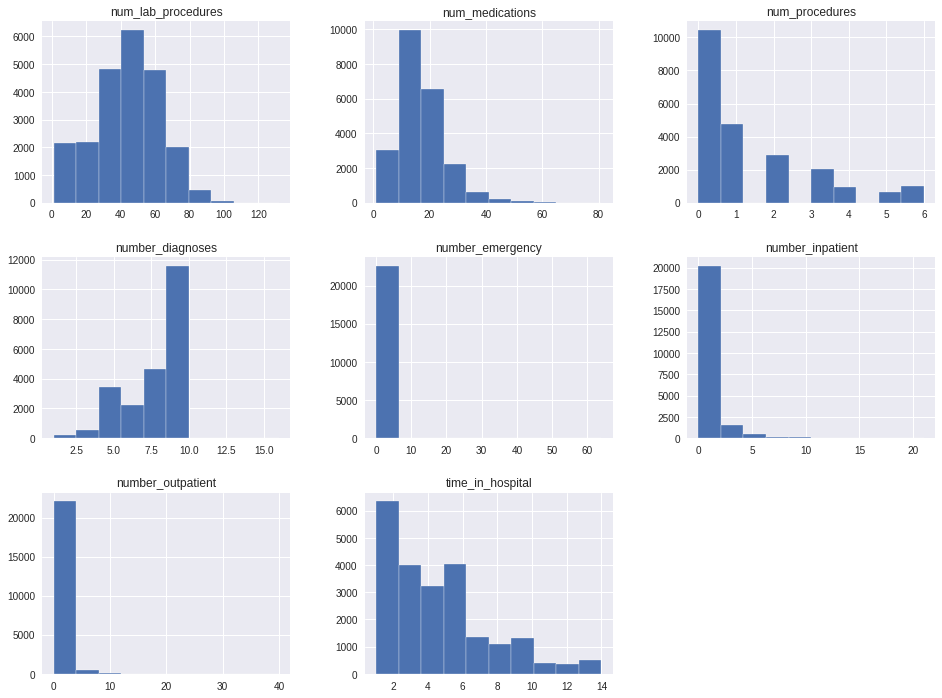

In [33]:
axes = downsampled_df.hist(column=continuous_features, figsize=(16,12))

In [34]:
downsampled_df[continuous_features].describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,22714.000000,22714.000000,22714.000000,22714.000000,22714.000000,22714.000000,22714.000000,22714.000000
mean,4.562076,43.586422,1.306815,16.426345,0.396848,0.274192,0.890156,7.544994
std,2.999868,19.523705,1.671193,8.055670,1.276139,1.215993,1.626279,1.862846
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,32.000000,0.000000,11.000000,0.000000,0.000000,0.000000,6.000000
50%,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,9.000000
75%,6.000000,57.000000,2.000000,21.000000,0.000000,0.000000,1.000000,9.000000
max,14.000000,132.000000,6.000000,81.000000,40.000000,64.000000,21.000000,16.000000


## Inspect Categorical Features - After Downsampling

In [35]:
display_categorical_features(downsampled_df,
                             features=categorical_features+output_features,
                             ignore=['diag_1', 'diag_2', 'diag_3'])


race: 5 unique values 



AfricanAmerican     4310
Asian                131
Caucasian          17046
Hispanic             464
Other                310
NaN                  453
Name: race, dtype: int64

--------------------------------------------------

gender: 3 unique values 



Female             12244
Male               10469
Unknown/Invalid        1
Name: gender, dtype: int64

--------------------------------------------------

age: 10 unique values 



[0-10)        30
[10-20)      112
[20-30)      408
[30-40)      829
[40-50)     2112
[50-60)     3655
[60-70)     4975
[70-80)     5988
[80-90)     3973
[90-100)     632
Name: age, dtype: int64

--------------------------------------------------

weight: 9 unique values 



>200             1
[0-25)          10
[100-125)      137
[125-150)       33
[150-175)        5
[175-200)        2
[25-50)         20
[50-75)        201
[75-100)       298
NaN          22007
Name: weight, dtype: int64

--------------------------------------------------

admission_type_id: 8 unique values 



1    12198
2     4140
3     4093
4        2
5     1041
6     1182
7        4
8       54
Name: admission_type_id, dtype: int64

--------------------------------------------------

discharge_disposition_id: 23 unique values 



1     12500
2       572
3      3519
4       189
5       373
6      3041
7       152
8        19
9         9
10        2
11      196
12        2
13       61
14       64
15       36
17        1
18      878
22      725
23       80
24       16
25      214
27        1
28       64
Name: discharge_disposition_id, dtype: int64

--------------------------------------------------

admission_source_id: 13 unique values 



1      6447
2       241
3        49
4       687
5       204
6       490
7     13053
8         2
9        25
10        2
17     1474
20       36
22        4
Name: admission_source_id, dtype: int64

--------------------------------------------------

payer_code: 16 unique values 



BC      952
CH       32
CM      438
CP      477
DM      131
HM     1368
MC     7389
MD      816
MP       16
OG      252
OT       17
PO      120
SI       14
SP     1078
UN      507
WC       22
NaN    9085
Name: payer_code, dtype: int64

--------------------------------------------------

medical_specialty: 62 unique values 



AllergyandImmunology                   4
Anesthesiology                         3
Anesthesiology-Pediatric               3
Cardiology                          1070
Cardiology-Pediatric                   2
DCPTEAM                                1
Dentistry                              2
Emergency/Trauma                    1703
Endocrinology                         18
Endocrinology-Metabolism               2
Family/GeneralPractice              1703
Gastroenterology                     118
Gynecology                             9
Hematology                            32
Hematology/Oncology                   69
Hospitalist                            9
InfectiousDiseases                    14
InternalMedicine                    3260
Nephrology                           435
Neurology                             34
                                   ...  
Psychology                            22
Pulmonology                          183
Radiologist                          237
Radiology       

--------------------------------------------------

max_glu_serum: 4 unique values 



>200      358
>300      323
None    21465
Norm      568
Name: max_glu_serum, dtype: int64

--------------------------------------------------

A1Cresult: 4 unique values 



>7        819
>8       1743
None    19087
Norm     1065
Name: A1Cresult, dtype: int64

--------------------------------------------------

metformin: 4 unique values 



Down        139
No        18557
Steady     3819
Up          199
Name: metformin, dtype: int64

--------------------------------------------------

repaglinide: 4 unique values 



Down          9
No        22344
Steady      325
Up           36
Name: repaglinide, dtype: int64

--------------------------------------------------

nateglinide: 4 unique values 



Down          3
No        22555
Steady      151
Up            5
Name: nateglinide, dtype: int64

--------------------------------------------------

chlorpropamide: 3 unique values 



No        22696
Steady       17
Up            1
Name: chlorpropamide, dtype: int64

--------------------------------------------------

glimepiride: 4 unique values 



Down         41
No        21600
Steady      987
Up           86
Name: glimepiride, dtype: int64

--------------------------------------------------

acetohexamide: 1 unique values 



No    22714
Name: acetohexamide, dtype: int64

--------------------------------------------------

glipizide: 4 unique values 



Down        144
No        19857
Steady     2526
Up          187
Name: glipizide, dtype: int64

--------------------------------------------------

glyburide: 4 unique values 



Down        113
No        20389
Steady     2031
Up          181
Name: glyburide, dtype: int64

--------------------------------------------------

tolbutamide: 2 unique values 



No        22710
Steady        4
Name: tolbutamide, dtype: int64

--------------------------------------------------

pioglitazone: 4 unique values 



Down         29
No        21115
Steady     1513
Up           57
Name: pioglitazone, dtype: int64

--------------------------------------------------

rosiglitazone: 4 unique values 



Down         12
No        21332
Steady     1334
Up           36
Name: rosiglitazone, dtype: int64

--------------------------------------------------

acarbose: 4 unique values 



Down          1
No        22662
Steady       49
Up            2
Name: acarbose, dtype: int64

--------------------------------------------------

miglitol: 4 unique values 



Down          3
No        22703
Steady        7
Up            1
Name: miglitol, dtype: int64

--------------------------------------------------

troglitazone: 1 unique values 



No    22714
Name: troglitazone, dtype: int64

--------------------------------------------------

tolazamide: 2 unique values 



No        22708
Steady        6
Name: tolazamide, dtype: int64

--------------------------------------------------

examide: 1 unique values 



No    22714
Name: examide, dtype: int64

--------------------------------------------------

citoglipton: 1 unique values 



No    22714
Name: citoglipton, dtype: int64

--------------------------------------------------

insulin: 4 unique values 



Down       3065
No        10060
Steady     6851
Up         2738
Name: insulin, dtype: int64

--------------------------------------------------

glyburide-metformin: 3 unique values 



Down          1
No        22557
Steady      156
Name: glyburide-metformin, dtype: int64

--------------------------------------------------

glipizide-metformin: 2 unique values 



No        22711
Steady        3
Name: glipizide-metformin, dtype: int64

--------------------------------------------------

glimepiride-pioglitazone: 2 unique values 



No        22713
Steady        1
Name: glimepiride-pioglitazone, dtype: int64

--------------------------------------------------

metformin-rosiglitazone: 2 unique values 



No        22713
Steady        1
Name: metformin-rosiglitazone, dtype: int64

--------------------------------------------------

metformin-pioglitazone: 1 unique values 



No    22714
Name: metformin-pioglitazone, dtype: int64

--------------------------------------------------

change: 2 unique values 



Ch    10846
No    11868
Name: change, dtype: int64

--------------------------------------------------

diabetesMed: 2 unique values 



No      4939
Yes    17775
Name: diabetesMed, dtype: int64

--------------------------------------------------

readmitted: 2 unique values 



<30    11357
>30    11357
Name: readmitted, dtype: int64

--------------------------------------------------


In [36]:
def identify_imbalanced_categories(df, categorical_features, pct_threshold):
    imbalanced = []
    for var in categorical_features:   
        counts = list(df[var].value_counts(dropna=False, normalize=True))
        if counts[0] * 100. > pct_threshold:
            imbalanced.append(var)
           
    return imbalanced
        
pct_threshold = 95
imbalanced_features = identify_imbalanced_categories(raw_df, categorical_features, pct_threshold)

print(imbalanced_features)

['weight', 'repaglinide', 'nateglinide', 'chlorpropamide', 'acetohexamide', 'tolbutamide', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']


In [37]:
for var in imbalanced_features:
    print(f'\n{var}: {downsampled_df[var].nunique()} unique values \n')
    display(downsampled_df[var].value_counts(dropna=False, normalize=True)*100.)
    print('-'*50)  


weight: 9 unique values 



NaN          96.887382
[75-100)      1.311966
[50-75)       0.884917
[100-125)     0.603152
[125-150)     0.145285
[25-50)       0.088051
[0-25)        0.044026
[150-175)     0.022013
[175-200)     0.008805
>200          0.004403
Name: weight, dtype: float64

--------------------------------------------------

repaglinide: 4 unique values 



No        98.371049
Steady     1.430836
Up         0.158493
Down       0.039623
Name: repaglinide, dtype: float64

--------------------------------------------------

nateglinide: 4 unique values 



No        99.299991
Steady     0.664788
Up         0.022013
Down       0.013208
Name: nateglinide, dtype: float64

--------------------------------------------------

chlorpropamide: 3 unique values 



No        99.920754
Steady     0.074844
Up         0.004403
Name: chlorpropamide, dtype: float64

--------------------------------------------------

acetohexamide: 1 unique values 



No    100.0
Name: acetohexamide, dtype: float64

--------------------------------------------------

tolbutamide: 2 unique values 



No        99.98239
Steady     0.01761
Name: tolbutamide, dtype: float64

--------------------------------------------------

acarbose: 4 unique values 



No        99.771066
Steady     0.215726
Up         0.008805
Down       0.004403
Name: acarbose, dtype: float64

--------------------------------------------------

miglitol: 4 unique values 



No        99.951572
Steady     0.030818
Down       0.013208
Up         0.004403
Name: miglitol, dtype: float64

--------------------------------------------------

troglitazone: 1 unique values 



No    100.0
Name: troglitazone, dtype: float64

--------------------------------------------------

tolazamide: 2 unique values 



No        99.973585
Steady     0.026415
Name: tolazamide, dtype: float64

--------------------------------------------------

examide: 1 unique values 



No    100.0
Name: examide, dtype: float64

--------------------------------------------------

citoglipton: 1 unique values 



No    100.0
Name: citoglipton, dtype: float64

--------------------------------------------------

glyburide-metformin: 3 unique values 



No        99.308796
Steady     0.686801
Down       0.004403
Name: glyburide-metformin, dtype: float64

--------------------------------------------------

glipizide-metformin: 2 unique values 



No        99.986792
Steady     0.013208
Name: glipizide-metformin, dtype: float64

--------------------------------------------------

glimepiride-pioglitazone: 2 unique values 



No        99.995597
Steady     0.004403
Name: glimepiride-pioglitazone, dtype: float64

--------------------------------------------------

metformin-rosiglitazone: 2 unique values 



No        99.995597
Steady     0.004403
Name: metformin-rosiglitazone, dtype: float64

--------------------------------------------------

metformin-pioglitazone: 1 unique values 



No    100.0
Name: metformin-pioglitazone, dtype: float64

--------------------------------------------------


# Features

In [38]:
print(f'Continuous:')
print(continuous_features)

print(f'\nCategorical:')
print(categorical_features)

print(f'\nImbalanced:')
print(imbalanced_features)

print(f'\nIgnore:')
print(ignore_features)

Continuous:
['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

Categorical:
['race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed']

Imbalanced:
['weight', 'repaglinide', 'nateglinide', 'chlorpropamide', 'acetohexamide', 'tolbutamide', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'glyburide-metfo

In [39]:
downsampled_df.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,49417008,24136641,Caucasian,Female,[80-90),NaN,5,3,17,4,NaN,NaN,26,0,24,0,0,0,481,428,599,8,>200,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
1,241333458,43123806,Caucasian,Female,[60-70),NaN,1,1,7,1,CM,NaN,40,0,12,0,0,0,427,276,401,6,None,Norm,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,<30
2,320700500,53195013,Hispanic,Male,[60-70),NaN,1,1,7,3,MC,NaN,55,0,16,0,0,1,786,414,V45,9,None,Norm,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,<30
3,287173320,96539697,Caucasian,Male,[70-80),NaN,1,6,7,2,UN,NaN,53,0,20,7,0,2,250.82,511,276,9,None,>8,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,<30
4,58349436,28059210,Other,Female,[70-80),NaN,5,11,17,1,NaN,NaN,24,1,21,0,0,0,578,785,518,8,>300,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
5,143336460,54924408,Caucasian,Female,[80-90),[75-100),1,1,7,2,MC,NaN,39,0,13,0,0,0,182,276,401,5,None,None,No,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,<30
6,252082566,86239674,Caucasian,Female,[70-80),NaN,2,1,1,2,HM,NaN,29,0,23,2,1,1,428,276,440,9,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,<30
7,53767290,74478915,Caucasian,Male,[60-70),NaN,6,1,17,2,NaN,Family/GeneralPractice,74,0,9,0,0,1,428,427,250.4,8,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30
8,407337680,134758751,AfricanAmerican,Male,[60-70),NaN,2,1,1,6,MC,NaN,50,6,13,0,0,0,780,425,585,9,None,>7,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,>30
9,424989572,103832127,Caucasian,Male,[60-70),NaN,2,1,1,6,HM,NaN,51,0,20,1,6,6,491,414,401,9,>300,>8,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,<30
